<h1>What are the lyrical differences between pop, rock and hip-hop songs? </h1>
<ul> 
    <li>
        <p>
            What are the common themes in each genre, are they shared or do they differentiate from genre to genre
        </p>
    </li>
        <li>
        <p>
            Do certain genres contain more mature language than the others?
        </p>
    </li>
</ul>

In [3]:
import pandas

<p> First we read the lyric excel file and filter out all the songs which does <i>not</i> have the Idiom English  </p>

In [4]:
lyrics = pandas.read_csv('lyrics-data.csv')
english_songs = lyrics['Idiom'] =='ENGLISH' 


In [5]:
english = lyrics[english_songs]

In [6]:
artist = pandas.read_csv('artists-data.csv')
print(artist.shape)
pop = artist['Genre'] == 'Pop'
rock = artist['Genre'] == 'Rock'
hiphop = artist['Genre'] == 'Hip Hop'

popsongs = artist[pop]
rocksongs = artist[rock]
hiphopsongs = artist[hiphop]

english_popsongs = pandas.merge(popsongs, english, left_on='Link', right_on='ALink')
english_popsongs.to_csv('englishPopSongs.csv', index=False)

english_rocksongs = pandas.merge(rocksongs, english, left_on='Link', right_on='ALink')
english_rocksongs.to_csv('englishRockSongs.csv', index=False)

english_hiphopsongs = pandas.merge(hiphopsongs, english, left_on='Link', right_on='ALink')
english_hiphopsongs.to_csv('englishHipHopSongs.csv', index=False)



(3242, 6)


In [7]:

# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [8]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = text.replace("'", "")
    return text

round2 = lambda x: clean_text_round2(x)

In [9]:
# Apply a third round of cleaning
def clean_text_round3(text):
    '''Get rid of â€™Ă©Ł§ˇŞ '''
    text = re.sub('[^A-Za-z0-9 ]+', '',text)
    return text

round3 = lambda x: clean_text_round3(x)

In [10]:
pop_data_clean_round1 = pandas.DataFrame(english_popsongs['Lyric'].apply(clean_text_round1))
rock_data_clean_round1 = pandas.DataFrame(english_rocksongs['Lyric'].apply(clean_text_round1))
hiphop_data_clean_round1 = pandas.DataFrame(english_hiphopsongs['Lyric'].apply(clean_text_round1))

In [11]:
pop_data_clean_round2 = pandas.DataFrame(english_popsongs['Lyric'].apply(clean_text_round2))
rock_data_clean_round2 = pandas.DataFrame(english_rocksongs['Lyric'].apply(clean_text_round2))
hiphop_data_clean_round2 = pandas.DataFrame(english_hiphopsongs['Lyric'].apply(clean_text_round2))

In [12]:
pop_data_clean_round3 = pandas.DataFrame(english_popsongs['Lyric'].apply(clean_text_round3))
rock_data_clean_round3 = pandas.DataFrame(english_rocksongs['Lyric'].apply(clean_text_round3))
hiphop_data_clean_round3 = pandas.DataFrame(english_hiphopsongs['Lyric'].apply(clean_text_round3))

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [14]:
# remove stop words
def clean_text_round4(text):
    stop_words = set(stopwords.words("english"))
    words = word_tokenize(text)
    cleanedText = '';
    for word in words:
        if word not in stop_words:
            cleanedText += '{} '.format(word)
    return cleanedText

In [15]:
pop_data_clean_round4 = pandas.DataFrame(pop_data_clean_round3['Lyric'].apply(clean_text_round4))
rock_data_clean_round4 = pandas.DataFrame(rock_data_clean_round3['Lyric'].apply(clean_text_round4))
hiphop_data_clean_round4 = pandas.DataFrame(hiphop_data_clean_round3['Lyric'].apply(clean_text_round4))

In [16]:
hiphop_data_clean_round4.to_csv('round4-hiphop.xlsx', index=False)

In [17]:
from collections import Counter
pop_mfw = Counter(" ".join(pop_data_clean_round4["Lyric"]).split()).most_common(10)


In [18]:
rock_mfw = Counter(" ".join(rock_data_clean_round4 ["Lyric"]).split()).most_common(10)

In [19]:
hiphop_mfw = Counter(" ".join(hiphop_data_clean_round4 ["Lyric"]).split()).most_common(10)

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk


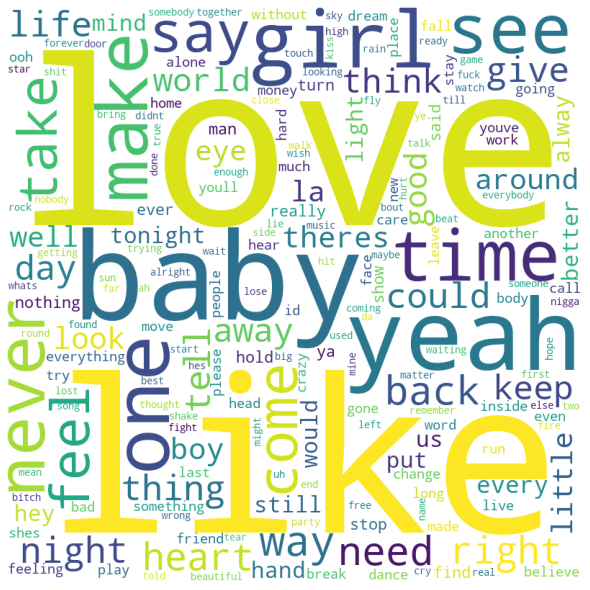

In [21]:
comment_words = ''
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['i', 'and', 'im', 'dont', 'the', 'na', 'got', 'get', 'but', 'oh', 'want', 'wan', 'go', 'gon', 'ill', 'your', 'thats', 'in', 'a' 'wont', 'ta', 'ive', 'when', 'what', 'to', 'let', 'the', 'if', 'em', 'aint', 'chorus', 'choru', 'know', 'cant', 'so', 'when','this', 'verse', 'youre','go', 'its', 'ive', 'in', 'wont','just', 'thi', 'cause', 'lets']
stopwords.extend(newStopWords)

for val in pop_data_clean_round4["Lyric"]:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
   
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords,
                collocations=False,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

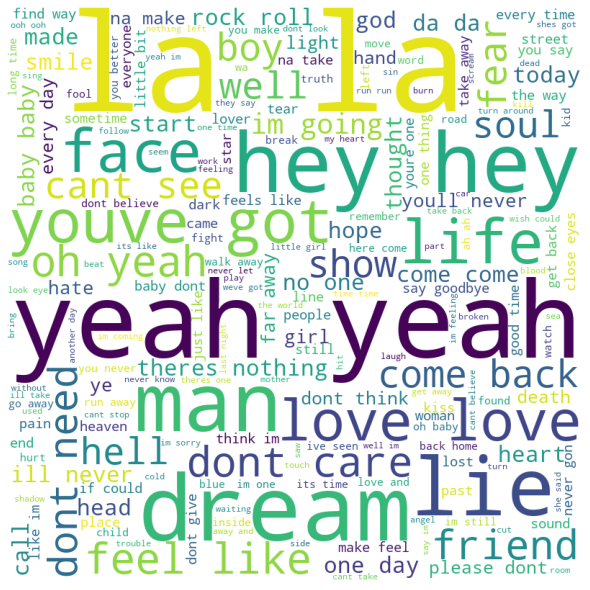

In [22]:
comment_words = ''
for val in rock_data_clean_round4["Lyric"]:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
   
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

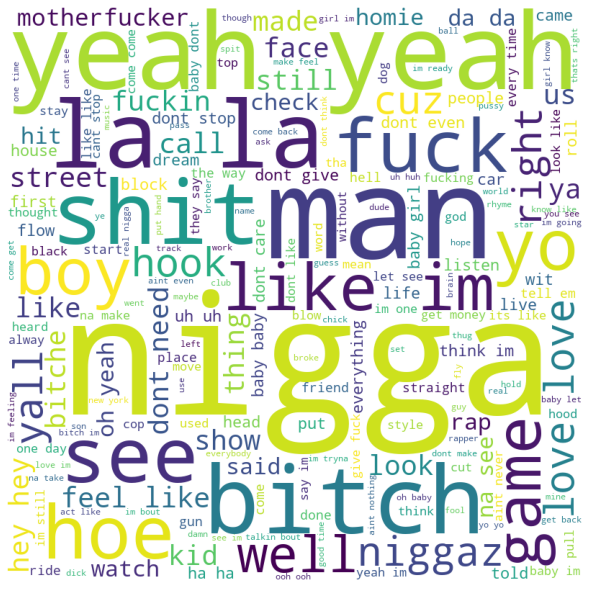

In [23]:
comment_words = ''
for val in hiphop_data_clean_round4["Lyric"]:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
   
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christianwitt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/christianwitt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


{"i'd", 'nor', 'during', 'not', 'what', 'has', 'k', 'where', 'cannot', 'dont', 'was', "she'll", "they're", 'below', 'i', 'do', "he'll", 'then', 'for', 'again', 'because', "hadn't", 'about', 'also', 'else', 'ive', 'why', 'been', 'only', 'be', 'wont', 'up', 'if', 'ta', 'lets', 'that', 'since', 'being', 'doing', 'a', 'com', "here's", "i've", 'any', 'which', 'by', "we're", 'own', 'choru', "why's", 'yourselves', "didn't", 'wan', "aren't", 'ever', 'from', 'more', 'further', 'there', 'ill', 'very', 'know', 'we', 'the', 'some', 'verse', "that's", "weren't", 'all', 'after', "don't", 'their', "let's", 'our', 'therefore', 'here', "how's", 'such', 'while', 'than', 'few', "i'll", 'and', 'are', 'could', 'so', 'his', 'into', "mustn't", "we'd", 'cant', 'aint', 'of', 'when', 'theirs', "you'll", 'r', "she'd", "you've", 'had', 'no', 'na', 'having', 'your', 'to', 'me', 'like', 'who', 'shall', 'however', 'hers', 'hence', 'chorus', 'once', 'she', 'ours', 'would', "he's", 'http', "she's", 'im', 'but', 'down'

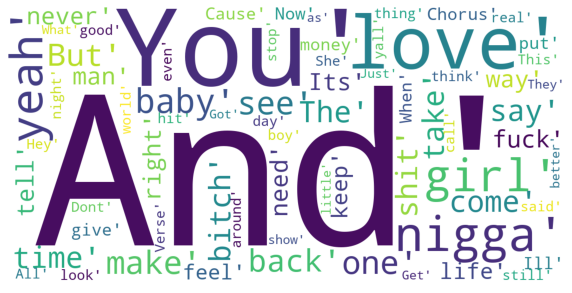

In [24]:
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import nltk
tw = TweetTokenizer()

def plot_wordcloud(text):
    nltk.download('stopwords')
    nltk.download('wordnet')
    stop = set(STOPWORDS)
    stop.update(['i', 'and', 'im', 'dont', 'the', 'na', 'got', 'get', 'but', 'oh', 'want', 'wan', 'go', 'gon', 'ill', 'your', 'thats', 'in', 'a' 'wont', 'ta', 'ive', 'when', 'what', 'to', 'let', 'the', 'if', 'em', 'aint', 'chorus', 'choru', 'know', 'cant', 'so', 'when','this', 'verse', 'youre','go', 'its', 'ive', 'in', 'wont','just', 'thi', 'cause', 'lets'])
    # print the stop word list
    print(stop)
    def _preprocess_text_clean(text):
        corpus_clean = []
        stem = PorterStemmer()
        lem = WordNetLemmatizer()
        for data in text:
            words = [w for w in tw.tokenize(data) if (w not in stop)]
            words = [lem.lemmatize(w) for w in words if len(w)>2]
            corpus_clean.append(words)
        return corpus_clean
    
    corpus_clean=_preprocess_text_clean(text)
    text_file = open("corpus_clean.txt", "w")
    n = text_file.write(str(corpus_clean))
    text_file.close()
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=70,
        collocations=False,
        max_font_size=150,
        scale=3,
        random_state=40)
    
    wordcloud = wordcloud.generate(str(corpus_clean))
    print(corpus_clean[:20])
    fig = plt.figure(1, figsize=(10,30))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

plot_wordcloud(hiphop_data_clean_round4["Lyric"])